In [1]:
import numpy as np
import os
import tensorflow as tf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
bad_frames='C:/Users/User/Downloads/Artificial Neural Network/models'

In [3]:
noisy_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
    if any(extension in file for extension in ['.jpg','jpeg']):
        image=tf.keras.preprocessing.image.load_img(bad_frames + '/' + file,target_size=(256,256))
        image=tf.keras.preprocessing.image.img_to_array(image).astype('float32') /255
        noisy_frames.append(image)
        
noisy_frames=np.array(noisy_frames)

  0%|          | 0/11 [00:00<?, ?it/s]

In [4]:
print(noisy_frames.shape)

(6, 256, 256, 3)


In [5]:
good_frames='C:/Users/User/Downloads/Artificial Neural Network/models'

In [6]:
clean_frames = []
for file in tqdm(sorted(os.listdir(good_frames))):
    if any(extension in file for extension in ['.jpg','jpeg']):
        image=tf.keras.preprocessing.image.load_img(good_frames + '/' + file,target_size=(256,256))
        image=tf.keras.preprocessing.image.img_to_array(image).astype('float32') /255
        clean_frames.append(image)
        
clean_frames=np.array(clean_frames)

  0%|          | 0/11 [00:00<?, ?it/s]

In [7]:
print(clean_frames.shape)

(6, 256, 256, 3)


In [8]:
round(len(noisy_frames)*0.8)

5

In [9]:
noisy_train = noisy_frames[0:round(len(noisy_frames)*0.9)]
noisy_test = noisy_frames[round(len(noisy_frames)*0.9):]

clean_train = clean_frames[0:round(len(clean_frames)*0.9)]
clean_test = clean_frames[round(len(clean_frames)*0.9):]

In [10]:
autoencoder=tf.keras.models.Sequential()
#layer1
autoencoder.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',input_shape=(256,256,3)))
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#layer3
autoencoder.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#layer4
autoencoder.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#layer5
autoencoder.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),padding='same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#layer6
autoencoder.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),padding='same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#layer7
autoencoder.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#layer8
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=32,kernel_size=(3,3),padding='same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#layer9
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=64,kernel_size=(3,3),padding='same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#layer11
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=3,kernel_size=(3,3),activation='sigmoid',padding='same'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      18464     
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      4624      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 16)      6

In [12]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
history=autoencoder.fit(noisy_train,clean_train,epochs=100,validation_data=(noisy_test,clean_test))

Train on 5 samples, validate on 1 samples
Epoch 1/100
5/5 [==============================] - 42s 8s/sample - loss: 0.7838 - val_loss: 0.6930
Epoch 2/100
5/5 [==============================] - 1s 126ms/sample - loss: 0.7240 - val_loss: 0.6924
Epoch 3/100
5/5 [==============================] - 1s 125ms/sample - loss: 0.6425 - val_loss: 0.6914
Epoch 4/100
5/5 [==============================] - 1s 126ms/sample - loss: 0.5885 - val_loss: 0.6902
Epoch 5/100
5/5 [==============================] - 1s 125ms/sample - loss: 0.5540 - val_loss: 0.6886
Epoch 6/100
5/5 [==============================] - 1s 125ms/sample - loss: 0.5308 - val_loss: 0.6867
Epoch 7/100
5/5 [==============================] - 1s 125ms/sample - loss: 0.5162 - val_loss: 0.6845
Epoch 8/100
5/5 [==============================] - 1s 126ms/sample - loss: 0.5095 - val_loss: 0.6820
Epoch 9/100
5/5 [==============================] - 1s 125ms/sample - loss: 0.5070 - val_loss: 0.6790
Epoch 10/100
5/5 [==============================] -

5/5 [==============================] - 1s 132ms/sample - loss: 0.4716 - val_loss: 0.6020
Epoch 82/100
5/5 [==============================] - 1s 132ms/sample - loss: 0.4715 - val_loss: 0.6015
Epoch 83/100
5/5 [==============================] - 1s 132ms/sample - loss: 0.4714 - val_loss: 0.6013
Epoch 84/100
5/5 [==============================] - 1s 133ms/sample - loss: 0.4714 - val_loss: 0.6012
Epoch 85/100
5/5 [==============================] - 1s 132ms/sample - loss: 0.4713 - val_loss: 0.6010
Epoch 86/100
5/5 [==============================] - 1s 132ms/sample - loss: 0.4713 - val_loss: 0.6008
Epoch 87/100
5/5 [==============================] - 1s 146ms/sample - loss: 0.4712 - val_loss: 0.6004
Epoch 88/100
5/5 [==============================] - 1s 133ms/sample - loss: 0.4712 - val_loss: 0.6000
Epoch 89/100
5/5 [==============================] - 1s 133ms/sample - loss: 0.4711 - val_loss: 0.5998
Epoch 90/100
5/5 [==============================] - 1s 131ms/sample - loss: 0.4711 - val_loss: 

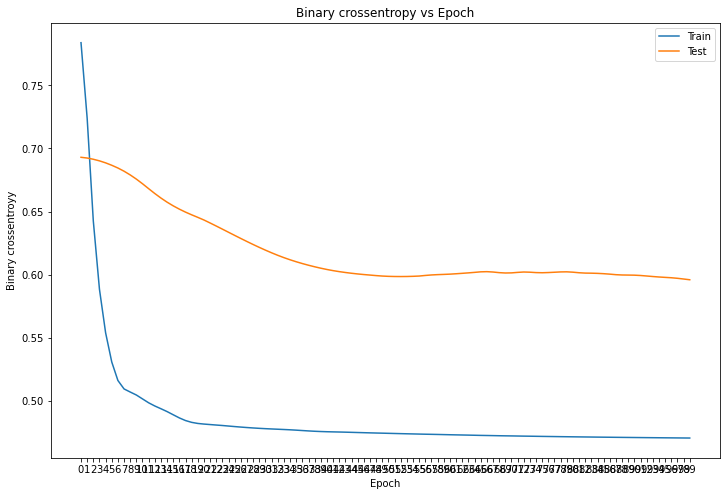

In [14]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Test'])
plt.title('Binary crossentropy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Binary crossentroyy')
plt.xticks(ticks=history.epoch, label=history.epoch)
plt.show()

In [15]:
result=autoencoder.predict(noisy_test)

In [16]:
image=np.random.randint(0,len(noisy_test))

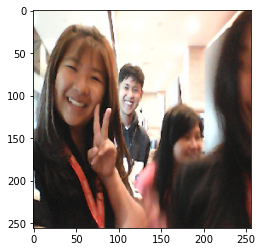

In [17]:
plt.imshow(noisy_test[image])
plt.show()

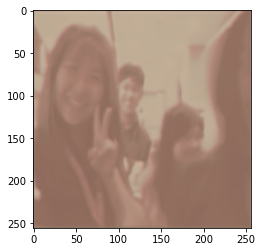

In [18]:
plt.imshow(result[image])
plt.show()